# Credit Card Approval Prediction using Data Science

## Project Objective
The objective of this project is to build a machine learning model that predicts
whether a credit card application should be approved or not based on applicant
demographic, income, and employment details.

This helps financial institutions reduce credit risk and make data-driven decisions.


In [1]:
import pandas as pd

df = pd.read_csv("application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
df.shape


(438557, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
df.describe()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365
df.drop('DAYS_BIRTH', axis=1, inplace=True)


In [7]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, 0)
df['EMPLOYMENT_YEARS'] = (-df['DAYS_EMPLOYED']) / 365
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)


In [8]:
df.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
AGE_YEARS                   0
EMPLOYMENT_YEARS            0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


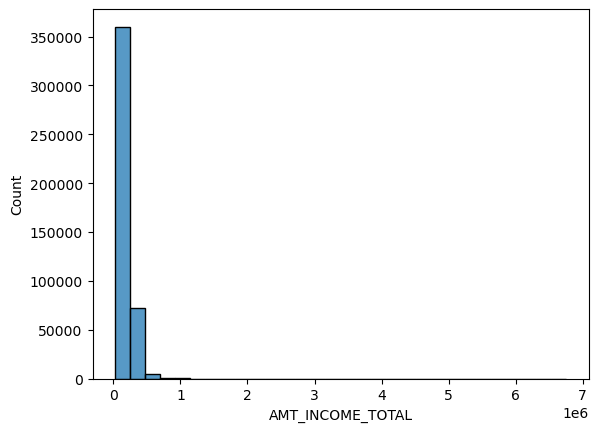

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['AMT_INCOME_TOTAL'], bins=30)
plt.show()


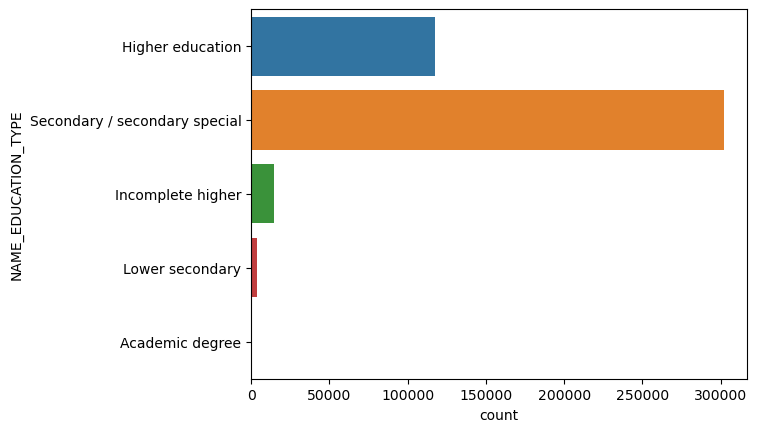

In [10]:
sns.countplot(y='NAME_EDUCATION_TYPE', data=df)
plt.show()


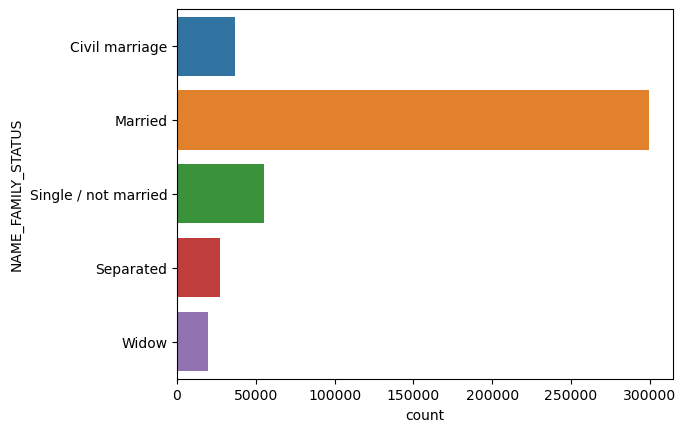

In [11]:
sns.countplot(y='NAME_FAMILY_STATUS', data=df)
plt.show()


In [12]:
df['APPROVED'] = (
    (df['AMT_INCOME_TOTAL'] > 250000) &
    (df['EMPLOYMENT_YEARS'] > 1)
).astype(int)


In [13]:
df['APPROVED'].value_counts()


APPROVED
0    372381
1     66176
Name: count, dtype: int64

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('APPROVED', axis=1)
y = df_encoded['APPROVED']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9337262860269975
[[72471  1842]
 [ 3971  9428]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     74313
           1       0.84      0.70      0.76     13399

    accuracy                           0.93     87712
   macro avg       0.89      0.84      0.86     87712
weighted avg       0.93      0.93      0.93     87712



In [18]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)


AMT_INCOME_TOTAL                        3.365731e-05
EMPLOYMENT_YEARS                        4.271072e-10
FLAG_OWN_CAR_Y                          3.675980e-11
NAME_EDUCATION_TYPE_Higher education    3.591426e-11
OCCUPATION_TYPE_Managers                3.150258e-11
CODE_GENDER_M                           2.884258e-11
FLAG_EMAIL                              1.403019e-11
CNT_CHILDREN                            9.986783e-12
NAME_INCOME_TYPE_State servant          7.632675e-12
CNT_FAM_MEMBERS                         5.587813e-12
dtype: float64

## Conclusion

- The model successfully predicts credit card approval
- Income and employment duration are the most important factors
- Logistic Regression provides good interpretability for business use

### Business Recommendations
- Focus on stable income customers
- Prefer long-term employed applicants
- Use data-driven thresholds for approval
